In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [ ]:
pip install fbprophet

# Time Series Modeling (ARIMA Methods) Assignment

In [66]:
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

<IPython.core.display.Javascript object>

### Import the Amazon stock price data set (AMZN_data.csv) and plot a line chart with the observed daily closing prices.

In [3]:
df = pd.read_csv("data/AMZN_data.csv")
df.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,261.4,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.2,263.25,256.600,257.21,3403403,AMZN


<IPython.core.display.Javascript object>

In [5]:
df["date"] = pd.to_datetime(df["date"])

<IPython.core.display.Javascript object>

In [ ]:
def ilinechart(df, x, y, groups=None, title=""):
    fig = px.line(
        df, x=x, y=y, color=groups, title=title, template="none"
    )  # .update(layout=dict(title=dict(x=0.5)))

    fig.show()

### Run an Autoregression (AR) model on the series and add the results to a column in the dataframe.

In [6]:
model = AR(df["close"]).fit()
df["AR"] = model.predict()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


<IPython.core.display.Javascript object>

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      c  -                  l                  o
Model:                         AR(23)   Log Likelihood               -4648.166
Method:                          cmle   S.D. of innovations             10.399
Date:                Thu, 29 Oct 2020   AIC                              4.724
Time:                        08:22:52   BIC                              4.827
Sample:                             0   HQIC                             4.763
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4849      0.705     -0.688      0.491      -1.866       0.896
L1.close       0.9845      0.029     34.157      0.000       0.928       1.041
L2.close       0.0442      0.041      1.082      0.279      -0.036       0.124
L3.close      -0.1000      0.041     -2.412      0.016      -0.181      -0.019
L4.close       0.0365      0.042      0.868      0.386      -0.046       0.119
L5.close       0.0636      0.043      1.483      0.138      -0.020       0.148
L6.close      -0.0248      0.043     -0.572      0.567      -0.110       0.060
L7.close      -0.0352      0.043     -0.811      0.418      -0.120       0.050
L8.close       0.0277      0.043      0.637      0.524      -0.057       0.113
L9.close       0.0354      0.043      0.815      0.415      -0.050       0.121
L10.close     -0.0475      0.043     -1.094      0.274      -0.133       0.038
L11.close      0.0544      0.044      1.250      0.211      -0.031       0.140
L12.close     -0.0459      0.044     -1.049      0.294      -0.132       0.040
L13.close     -0.0051      0.044     -0.116      0.908      -0.091       0.081
L14.close      0.0234      0.044      0.536      0.592      -0.062       0.109
L15.close     -0.0172      0.044     -0.393      0.694      -0.103       0.068
L16.close      0.0247      0.044      0.565      0.572      -0.061       0.110
L17.close      0.0208      0.044      0.476      0.634      -0.065       0.107
L18.close     -0.0037      0.044     -0.084      0.933      -0.089       0.082
L19.close      0.0060      0.044      0.137      0.891      -0.080       0.092
L20.close     -0.0121      0.044     -0.277      0.781      -0.098       0.074
L21.close     -0.0442      0.044     -1.010      0.312      -0.130       0.042
L22.close     -0.0050      0.044     -0.114      0.909      -0.091       0.081
L23.close      0.0218      0.031      0.715      0.474      -0.038       0.082
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9976           -0.0000j            0.9976           -0.0000
AR.2             1.0491           -0.4083j            1.1257           -0.0591
AR.3             1.0491           +0.4083j            1.1257            0.0591
AR.4             1.1498           -0.0000j            1.1498           -0.0000
AR.5             0.5850           -0.9645j            1.1281           -0.1632
AR.6             0.5850           +0.9645j            1.1281            0.1632
AR.7             0.8467           -0.7107j            1.1055           -0.1111
AR.8             0.8467           +0.7107j            1.1055            0.1111
AR.9             1.5500           -0.0000j            1.5500           -0.0000
AR.10            0.3001           -1.1024j            1.1425           -0.2077
AR

<IPython.core.display.Javascript object>

### Plot a multi-line chart comparing the AR model's results with the observed values.

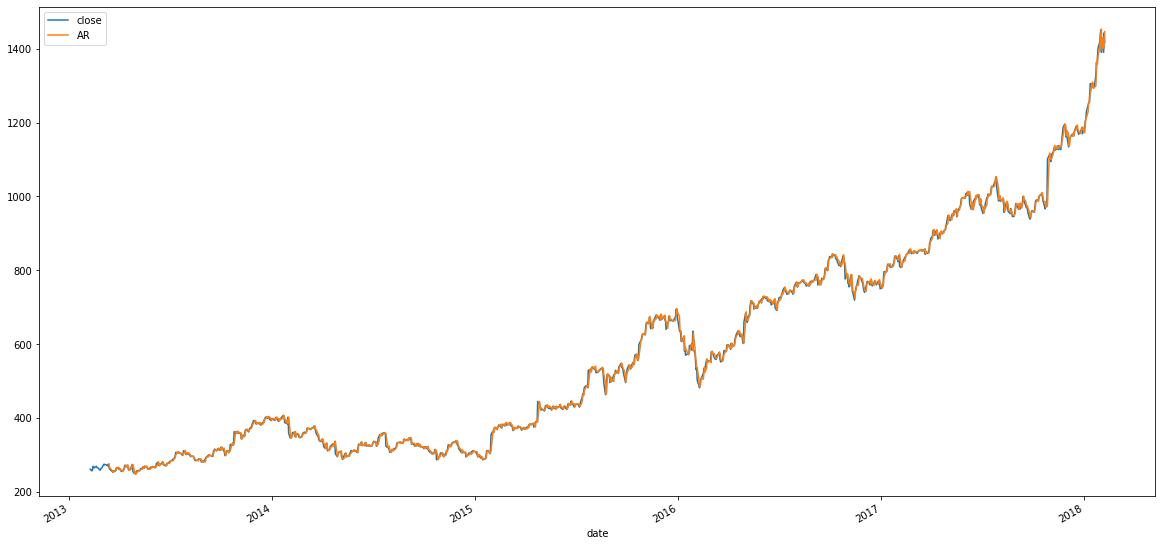

<IPython.core.display.Javascript object>

In [9]:
df.set_index("date")[["close", "AR"]].plot(figsize=(20, 10))

### Run a Moving Average (MA) model on the series and add the results to a column in the dataframe.

In [87]:
model = ARMA(df["close"], order=(0, 1)).fit()
df["MA"] = model.predict()

<IPython.core.display.Javascript object>

### Print the model summary and add the model's results to the line chart with observations and the AR model results.

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood               -8047.769
Method:                       css-mle   S.D. of innovations            144.300
Date:                Thu, 29 Oct 2020   AIC                          16101.538
Time:                        09:00:41   BIC                          16116.952
Sample:                             0   HQIC                         16107.331
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         576.9810      8.063     71.561      0.000     561.178     592.784
ma.L1.close     0.9834      0.004    226.362      0.000       0.975       0.992
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0169           +0.0000j            1.0169            0.5000
-----------------------------------------------------------------------------
"""

<IPython.core.display.Javascript object>

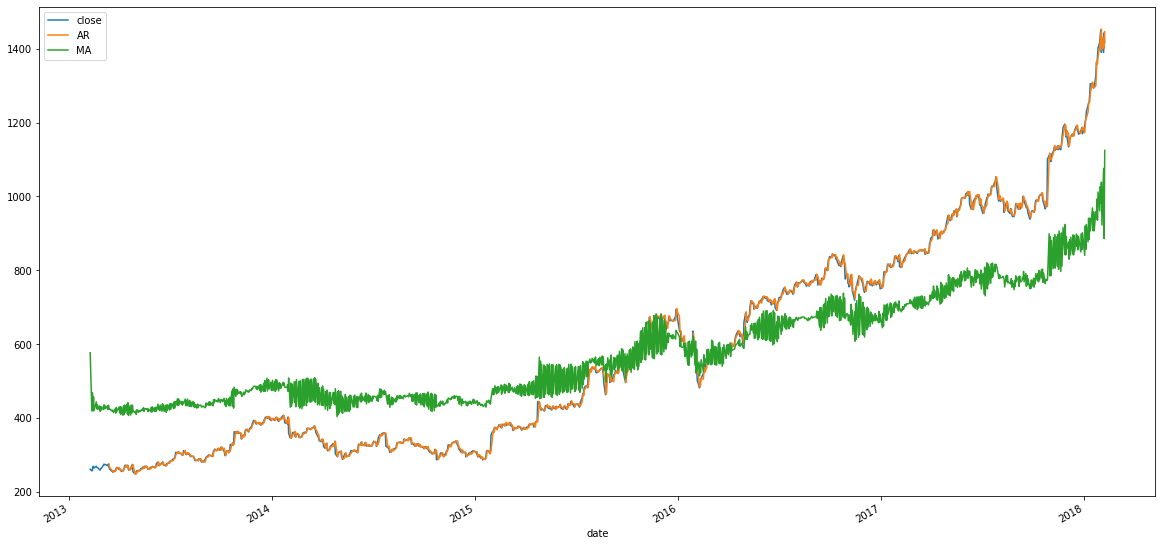

<IPython.core.display.Javascript object>

In [89]:
df.set_index("date")[["close", "AR", "MA"]].plot(figsize=(20, 10))

### Run an Autoregressive Moving Average (ARMA) model on the series and add the results to a column in the dataframe.

Hint: You will need to make the time series stationary in order to run the ARMA model on it. The most common way to do this is by differncing, or subtracting the previous observed value from the current one.

In [13]:
df["diff"] = df["close"].diff()

<IPython.core.display.Javascript object>

In [68]:
df["diff"] = df["close"] - df["close"].shift()
df["shift"] = df["close"].shift()
df["diff"] = df["diff"].fillna(0)

<IPython.core.display.Javascript object>

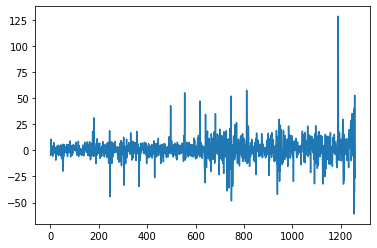

<IPython.core.display.Javascript object>

In [30]:
df["diff"].plot()

In [69]:
model = ARMA(df["diff"], order=(1, 1)).fit()
df["ARMA"] = df["shift"] + model.predict()

<IPython.core.display.Javascript object>

In [46]:
df.head()

,date,open,high,low,close,volume,Name,AR,MA,diff,ARMA
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,NaN,576.980998,NaN,NaN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,NaN,419.487647,-4.74,NaN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,NaN,468.821249,1.49,259.762096
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,NaN,419.441749,10.77,270.281929
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,NaN,457.054183,-0.23,269.986186


<IPython.core.display.Javascript object>

### Print the model summary and generate a multi-line chart that compares the ARMA model's results with those from the AR and MA models.

Hint: You will need to de-difference the model results by adding the previous observed values to them.

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   diff   No. Observations:                 1259
Model:                     ARMA(1, 1)   Log Likelihood               -4737.464
Method:                       css-mle   S.D. of innovations             10.422
Date:                Thu, 29 Oct 2020   AIC                           9482.927
Time:                        08:56:58   BIC                           9503.480
Sample:                             0   HQIC                          9490.651
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9184      0.289      3.173      0.002       0.351       1.486
ar.L1.diff    -0.6764      0.277     -2.443      0.015      -1.219      -0.134
ma.L1.diff     0.6519      0.283      2.302      0.021       0.097       1.207
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4785           +0.0000j            1.4785            0.5000
MA.1           -1.5341           +0.0000j            1.5341            0.5000
-----------------------------------------------------------------------------
"""

<IPython.core.display.Javascript object>

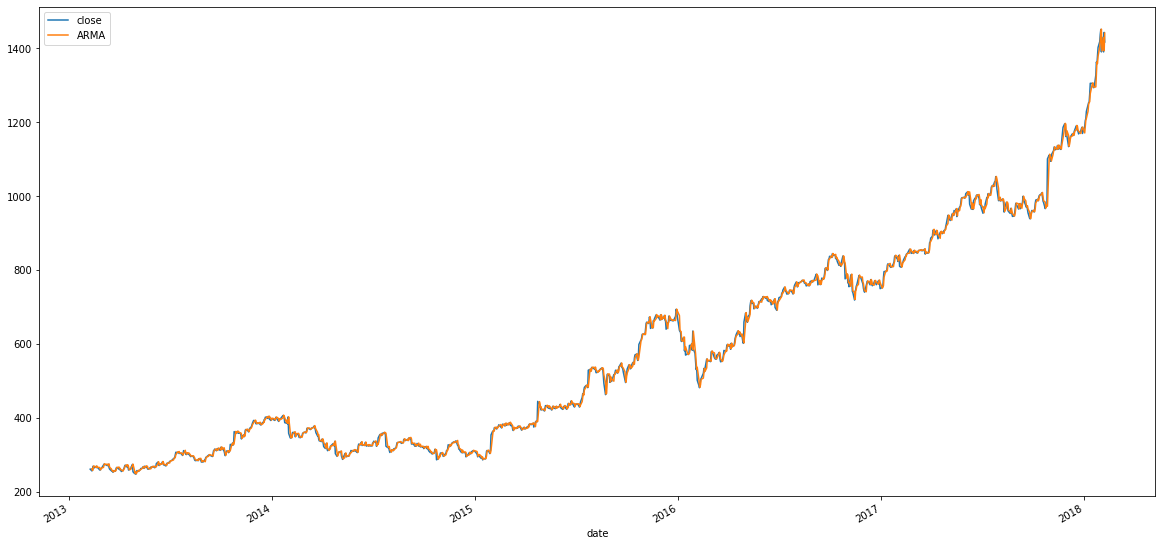

<IPython.core.display.Javascript object>

In [71]:
df.set_index("date")[["close", "ARMA"]].plot(figsize=(20, 10))

### Run an Autoregressive Integrated Moving Average (ARIMA) model on the series and add the results to a column in the dataframe.

In [72]:
model = ARIMA(df["diff"], order=(1, 1, 1),).fit()
df["ARIMA"] = df["shift"] + model.predict()

<IPython.core.display.Javascript object>

### Print the model summary and generate a multi-line chart that compares the ARIMA model's results to the observed values.

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.diff   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4735.276
Method:                       css-mle   S.D. of innovations             10.406
Date:                Thu, 29 Oct 2020   AIC                           9478.553
Time:                        08:57:22   BIC                           9499.102
Sample:                             1   HQIC                          9486.276
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0020      0.001      2.499      0.012       0.000       0.004
ar.L1.D.diff    -0.0129      0.028     -0.456      0.649      -0.068       0.043
ma.L1.D.diff    -1.0000      0.003   -394.257      0.000      -1.005      -0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -77.6238           +0.0000j           77.6238            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<IPython.core.display.Javascript object>

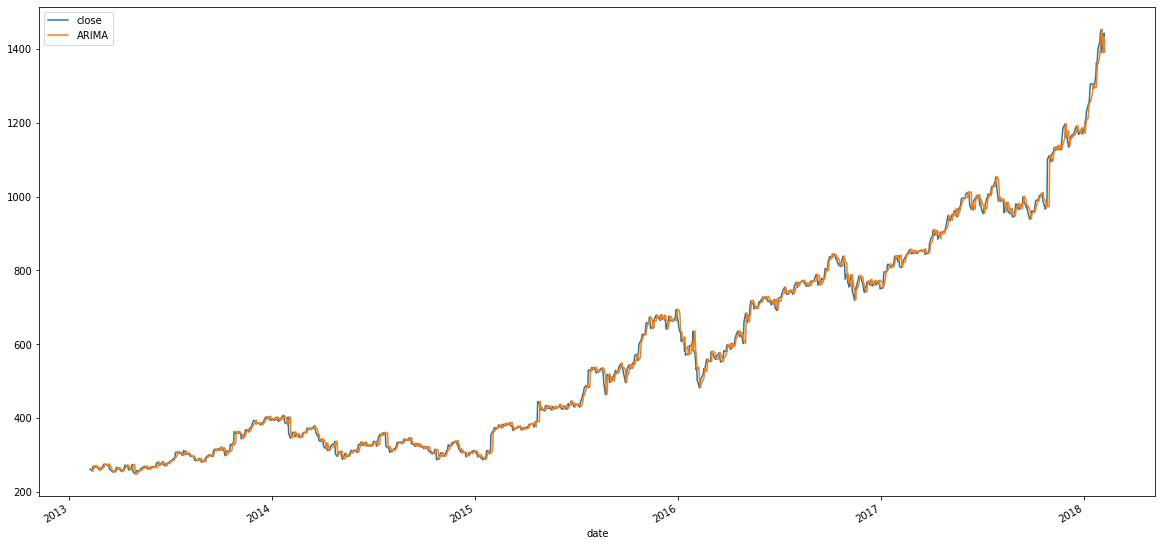

<IPython.core.display.Javascript object>

In [74]:
df.set_index("date")[["close", "ARIMA"]].plot(figsize=(20, 10))

### Run an Seasonal Autoregressive Integrated Moving Average (SARIMA) model on the series and add the results to a column in the dataframe.

In [97]:
model = SARIMAX(df["close"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 2)).fit()
df["SARIMA"] = model.predict()

<IPython.core.display.Javascript object>

### Print the model summary and generate a multi-line chart that compares the SARMA model's results with the observed values.

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             close   No. Observations:                 1259
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood               -4732.272
Date:                           Thu, 29 Oct 2020   AIC                           9474.544
Time:                                   09:56:56   BIC                           9500.222
Sample:                                        0   HQIC                          9484.195
                                          - 1259                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0059     86.657   6.83e-05      1.000    -169.839     169.851
ma.L1         -0.0143     86.653     -0.000      1.000    -169.852     169.823
ar.S.L2        0.0234      0.727      0.032      0.974      -1.401       1.448
ma.S.L2       -0.9904      0.006   -178.635      0.000      -1.001      -0.979
sigma2       109.0013      1.327     82.126      0.000     106.400     111.603
===================================================================================
Ljung-Box (Q):                       46.60   Jarque-Bera (JB):             26924.90
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               4.53   Skew:                             1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<IPython.core.display.Javascript object>

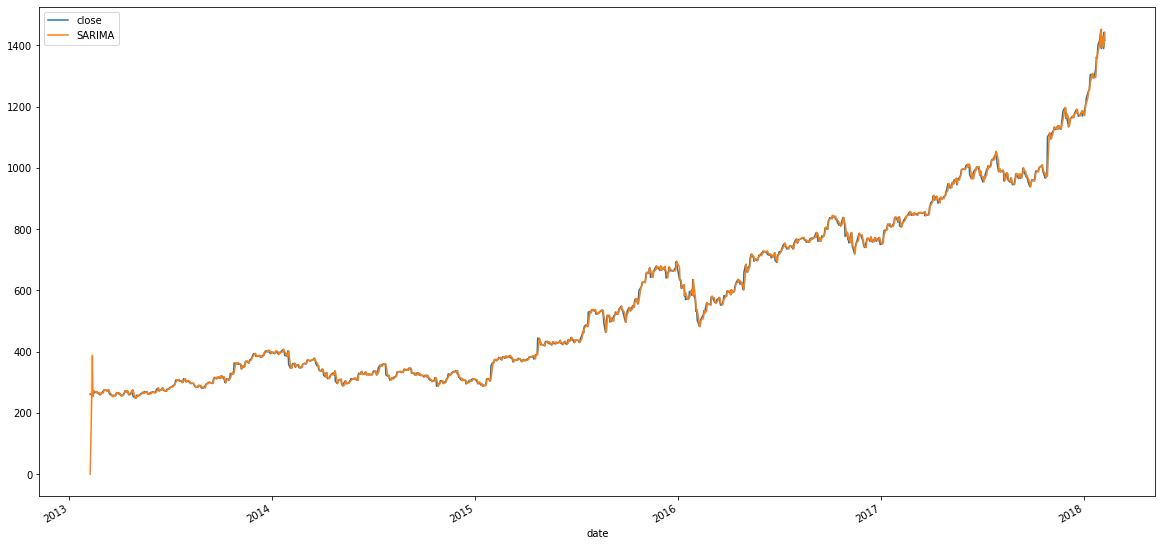

<IPython.core.display.Javascript object>

In [99]:
df.set_index("date")[["close", "SARIMA"]].plot(figsize=(20, 10))

### Run an Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) model on the series and add the results to a column in the dataframe.

Use the daily Open prices as the exogenous factors.

In [78]:
model = SARIMAX(
    df["close"], exog=df["open"], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)
).fit()
df["SARIMAX"] = model.predict()

<IPython.core.display.Javascript object>

### Print the model summary and generate a multi-line chart that compares the SARMAX model's results with the SARIMA model's values.

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4452.470
Date:                Thu, 29 Oct 2020   AIC                           8912.941
Time:                        08:57:46   BIC                           8933.490
Sample:                             0   HQIC                          8920.663
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
open           0.9996      0.001   1609.353      0.000       0.998       1.001
ar.L1          0.0074      0.015      0.501      0.616      -0.021       0.036
ma.L1         -1.0000      0.329     -3.044      0.002      -1.644      -0.356
sigma2        69.0704     22.671      3.047      0.002      24.636     113.505
===================================================================================
Ljung-Box (Q):                       56.65   Jarque-Bera (JB):              8509.99
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               6.13   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<IPython.core.display.Javascript object>

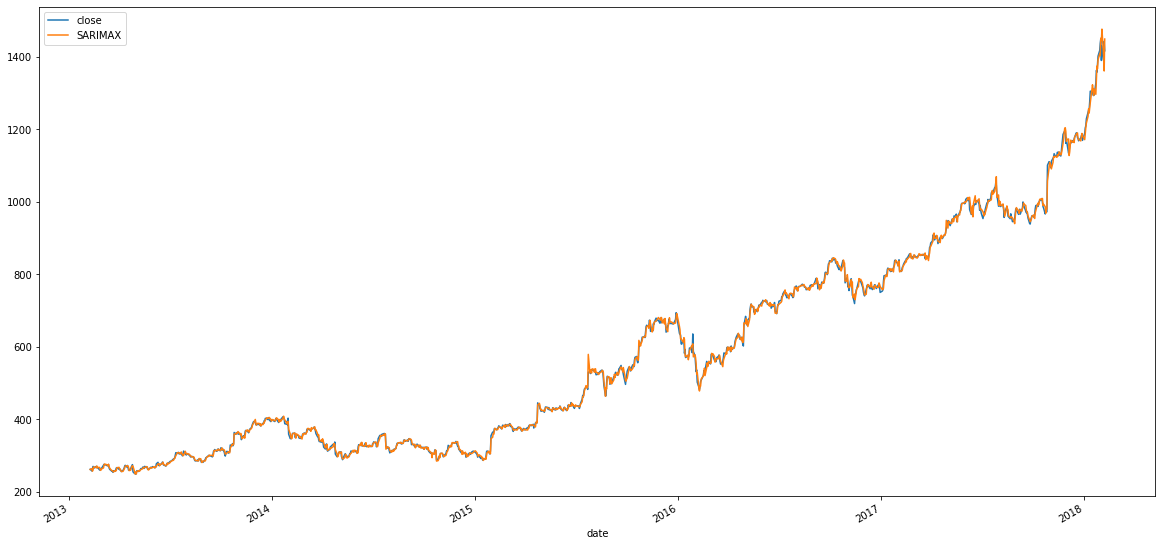

<IPython.core.display.Javascript object>

In [80]:
df.set_index("date")[["close", "SARIMAX"]].plot(figsize=(20, 10))

### Evaluate the performance of all the models and compare to each other, using Mean Absolute Error and Root Mean Squared Error as your evaluation metrics.

In [100]:
models = ["AR", "MA", "ARMA", "ARIMA", "SARIMA", "SARIMAX"]

for model in models:
    diff = df["close"] - df[model]
    mae = diff.abs().mean()
    rmse = np.sqrt(np.mean(diff ** 2))
    print(f"Model {model} - MAE: {mae} | RMSE: {rmse}")

Model AR - MAE: 6.636754781948567 | RMSE: 10.399040851606227
Model MA - MAE: 124.57780280371058 | RMSE: 144.63072903383156
Model ARMA - MAE: 6.596711150657892 | RMSE: 10.426318400806059
Model ARIMA - MAE: 9.619060277000564 | RMSE: 14.74436390032617
Model SARIMA - MAE: 6.9119505032925455 | RMSE: 13.295800260864295
Model SARIMAX - MAE: 5.5536370037148055 | RMSE: 8.317116572948922


<IPython.core.display.Javascript object>